<a href="https://colab.research.google.com/github/lokeshpara/Deeplearning/blob/S13/S13_Thor_video_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!git clone https://github.com/theschoolofai/YoloV3.git

In [1]:
!nvidia-smi

Mon May 11 09:58:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S13b/YoloV3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S13b/YoloV3


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

 Baby_Groot.mp4   output_video/      runs/             'ubdivisions=1'
 cfg/             __pycache__/       test_batch0.png    utils/
 data/            README.md          test.py            vim.exe.stackdump
 detect.py       'results (1).txt'   thor.mp4           weights/
 models.py        results.json       ting
 out_out/         results.png        train_batch0.png
 output/          results.txt        train.py


In [5]:
!ls

 Baby_Groot.mp4   output_video	     runs	       'ubdivisions=1'
 cfg		  __pycache__	     test_batch0.png    utils
 data		  README.md	     test.py	        vim.exe.stackdump
 detect.py	 'results (1).txt'   thor.mp4	        weights
 models.py	  results.json	     ting
 out_out	  results.png	     train_batch0.png
 output		  results.txt	     train.py


In [6]:
!ls data/customdata

custom.data  custom.names  custom.shapes  custom.txt  images  labels


In [8]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-11 10:08:47.182725: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (499 found, 1 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 1090.36it/s]
Caching images (0.2GB): 100% 500/500 [00:01<00:00, 268.53it/s]
Caching labels (499 found, 1 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/5

In [9]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/thor1.jpg: 320x512 1 Thors, Done. (0.015s)
image 2/500 data/customdata/images/thor10.jpg: 320x512 1 Thors, Done. (0.014s)
image 3/500 data/customdata/images/thor100.jpg: 320x512 1 Thors, Done. (0.015s)
image 4/500 data/customdata/images/thor101.jpg: 256x512 1 Thors, Done. (0.013s)
image 5/500 data/customdata/images/thor102.jpg: 512x448 1 Thors, Done. (0.018s)
image 6/500 data/customdata/images/thor103.jpg: 384x512 1 Thors, Done. (0.016s)
image 7/500 data/customdata/images/tho

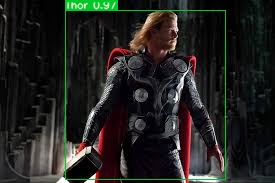

In [23]:
Image(filename='out_out/thor29.jpg', width=600)

In [11]:
!python detect.py --source thor.mp4 --conf-thres 0.1 --output output_video

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output_video', save_txt=False, source='thor.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (2/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (3/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (4/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (5/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (6/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (7/1024) thor.mp4: 320x512 Done. (0.015s)
video 1/1 (8/1024) thor.mp4: 320x512 Done. (0.015s)
video 1/1 (9/1024) thor.mp4: 320x512 Done. (0.016s)
video 1/1 (10/1024) thor.mp4: 320x512 Done. (0.015s)
vid